# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                 header=None,skipinitialspace=True,
                 names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                        "hours-per-week", "native-country", "50K"])

In [4]:
#df.head()

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [5]:
# Впишите решение сюда
df.groupby(['sex']).size()

sex
Female    10771
Male      21790
dtype: int64

| Мужчин |Женщин |
|--------|-------|
|   21790| 10771 |

### Вопрос 2
Каков средний возраст мужчин?


In [6]:
# Впишите решение сюда
df[(df['sex']=='Male')]['age'].mean()

39.433547498852683

**Средний возраст мужчин чуть больше 39**

### Вопрос 3
Какова доля граждан США?

In [7]:
# Впишите решение сюда
df.groupby(['native-country']).size().transform(lambda x: x/sum(x))

native-country
?                             0.017905
Cambodia                      0.000584
Canada                        0.003716
China                         0.002303
Columbia                      0.001812
Cuba                          0.002918
Dominican-Republic            0.002150
Ecuador                       0.000860
El-Salvador                   0.003255
England                       0.002764
France                        0.000891
Germany                       0.004207
Greece                        0.000891
Guatemala                     0.001966
Haiti                         0.001351
Holand-Netherlands            0.000031
Honduras                      0.000399
Hong                          0.000614
Hungary                       0.000399
India                         0.003071
Iran                          0.001321
Ireland                       0.000737
Italy                         0.002242
Jamaica                       0.002488
Japan                         0.001904
Laos      

**Доля граждан США 89.59%**

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

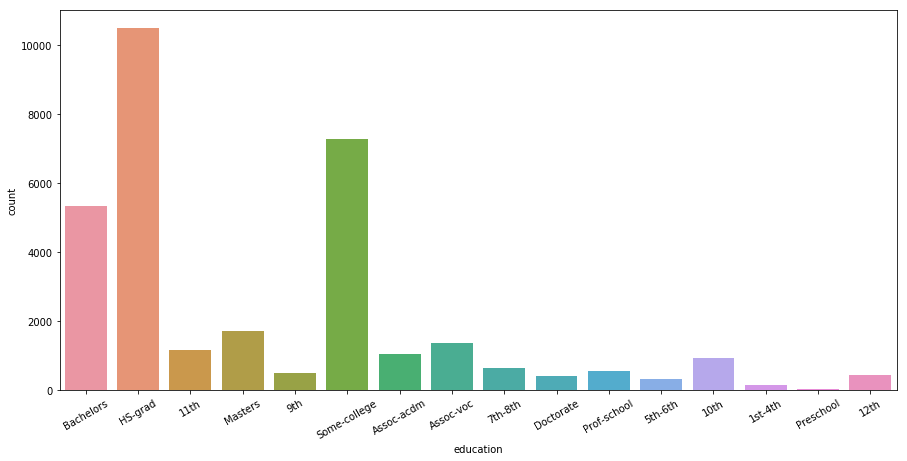

In [8]:
# Впишите решение сюда
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(15,7)
g=sns.countplot(x='education', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [9]:
# Впишите решение сюда
df[(df['marital-status']=='Divorced')]['fnlwgt'].mean()

185802.79045689848

In [10]:
df[(df['marital-status']=='Divorced')]['fnlwgt'].std()

105646.78945933598

| Среднее |Стандартное отклонение |
|--------|-------|
|   185802.8| 105646.8 |

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

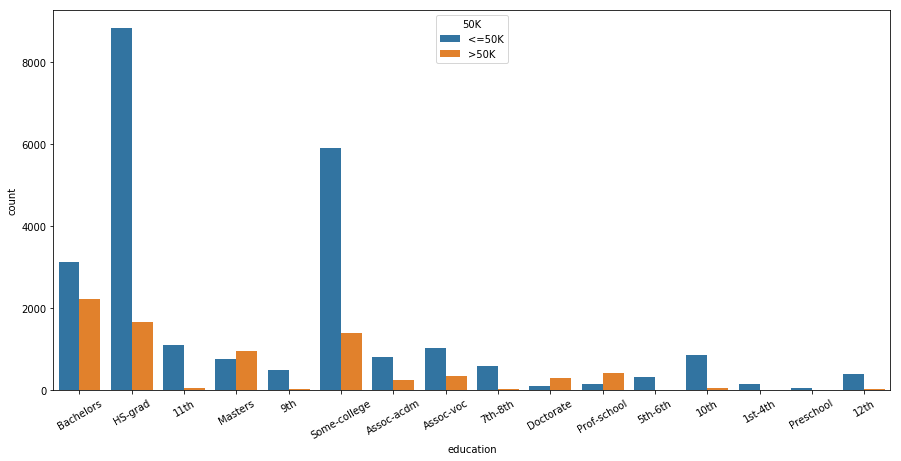

In [11]:
# Впишите решение сюда
g=sns.countplot(x='education', data=df, hue='50K')
g.set_xticklabels(g.get_xticklabels(), rotation=30);

По информации с вики( https://en.wikipedia.org/wiki/Education_in_the_United_States#Educational_stages ), высшее образование это бакалавриат, магистратура, колледж, докторантура ...

Из графика видно, что среди тех, кто зарабатывает больше 50К, преобладают люди с высшим образованием.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [12]:
# Впишите решение сюда
df.groupby('race')['age'].max()

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [13]:
# Впишите решение сюда
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [14]:
df[(df['occupation']=='Farming-fishing')].groupby('native-country').size().keys()

Index(['?', 'Cambodia', 'Canada', 'Cuba', 'El-Salvador', 'England', 'France',
       'Germany', 'Guatemala', 'Hong', 'Ireland', 'Italy', 'Japan', 'Mexico',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'United-States',
       'Vietnam', 'Yugoslavia'],
      dtype='object', name='native-country')

**Cambodia, Canada, Cuba, El-Salvador, England, France, Germany, Guatemala, Hong, Ireland, Italy, Japan, Mexico, Philippines, Poland, Portugal, Puerto-Rico, United-States, Vietnam, Yugoslavia**

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [72]:
# Впишите решение сюда
first_ratio = df[(df['sex']=='Male') & (df['education']=='Bachelors')].shape[0] / df[(df['sex']=='Male') & (df['education']=='Masters')].shape[0]
second_ratio = df[(df['sex']=='Female') & (df['education']=='Bachelors')].shape[0] / df[(df['sex']=='Female') & (df['education']=='Masters')].shape[0]
print(first_ratio,second_ratio)

3.14743049705139 3.0205223880597014


**Первое отношение больше**

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [75]:
# Впишите решение сюда
df['hours-per-week'].max()

99

**Максимальное количество рабочих часов в неделю 99**

In [76]:
df[(df['hours-per-week']==99)].shape[0]

85

**85 человек работают 99 часов в неделю**

In [78]:
df[(df['hours-per-week']==99)].groupby('50K').size()

50K
<=50K    60
>50K     25
dtype: int64

**60 из них получают меньше 50К, 25 больше или равно 50К**